In [2]:
# Import packages and load the data
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# import numpy.linalg as lin
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

incomes= np.loadtxt('incomes.txt', delimiter=',', unpack=True)


## 1a)

(0, 150000)

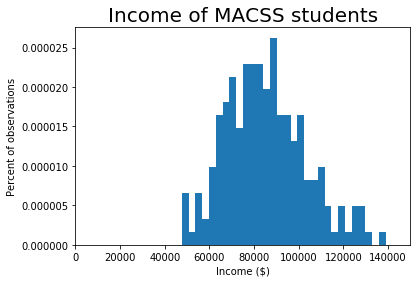

In [3]:
fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

## 1b)

In [24]:

def lognorm_pdf(x, mu, sigma):
    pdf_vals    = (1/(x * sigma * np.sqrt(2 * np.pi))) *\
                    np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))    
    return pdf_vals

def data_moments(xvals):
    mean_data = xvals.mean()
    std_data = xvals.std()

    return mean_data, std_data

def model_moments(mu, sigma):
    xfx = lambda x: x * lognorm_pdf(x, mu, sigma) # define function getting the mean 
    (mean_model, m_m_err) = intgr.quad(xfx, 0, 150000) 
    x2fx = lambda x: ((x - mean_model) ** 2) * lognorm_pdf(x, mu, sigma) # define function getting the variance 
    (std_model, v_m_err) = intgr.quad(x2fx, 0, 150000) 

    return mean_model, np.sqrt(std_model)

def err_vec(xvals, mu, sigma):
    mean_data, std_data = data_moments(xvals) #getting data moments (getting the mean and variance of the data)
    moms_data = np.array([[mean_data], [std_data]]) #arranging code into a 2x1 vector 
    mean_model, std_model = model_moments(mu, sigma)#model moments, new function- doesn't need the data 
    moms_model = np.array([[mean_model], [std_model]])
    err_vec = (moms_model - moms_data) / moms_data

    return err_vec

def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma)
    crit_val = err.T @ W @ err
    return crit_val

In [25]:
mu_init = 1
sig_init = 0.2

params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (incomes,  W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))  
mu_GMM1, sig_GMM1 = results.x
print (results)
mean_data, std_data = data_moments(incomes)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(incomes, mu_GMM1, sig_GMM1).reshape(2,)
params_GMM = np.array([mu_GMM1, sig_GMM1])
GMMvalue = criterion(params_GMM, *gmm_args)
# print("Value of GMM criterion:", GMMvalue)
# print('Mean of points:', mean_data, ', Standard Deviation of points:', std_data)
# print('Mean of model:', mean_model, ', Standard Deviation of model:', std_model)
print(f'The GMM estimated mu and sigma of lognormal distribution is {mu_GMM1:.2f} and {sig_GMM1:.2f}')
print (f'The GMM estimated mean is {mean_model:.2f}, sigma is {std_model:.2f}.')
print (f'The data mean is {mean_data:.2f}, sigma is {std_data:.2f}.')
#criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
print(f'The value of the criterion function at GMM is {criterion((mu_GMM1, sig_GMM1),incomes,np.eye(2))}')
# plot_plots(income, mu_GMM1, sig_GMM1, "1b")
# print (err_vec())


      fun: array([[ 2.]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([ 1. ,  0.2])
The GMM estimated mu and sigma of lognormal distribution is 1.00 and 0.20
The GMM estimated mean is 0.00, sigma is 0.00.
The data mean is 85276.82, sigma is 17992.54.
The value of the criterion function at GMM is [[ 2.]]


<IPython.core.display.Javascript object>


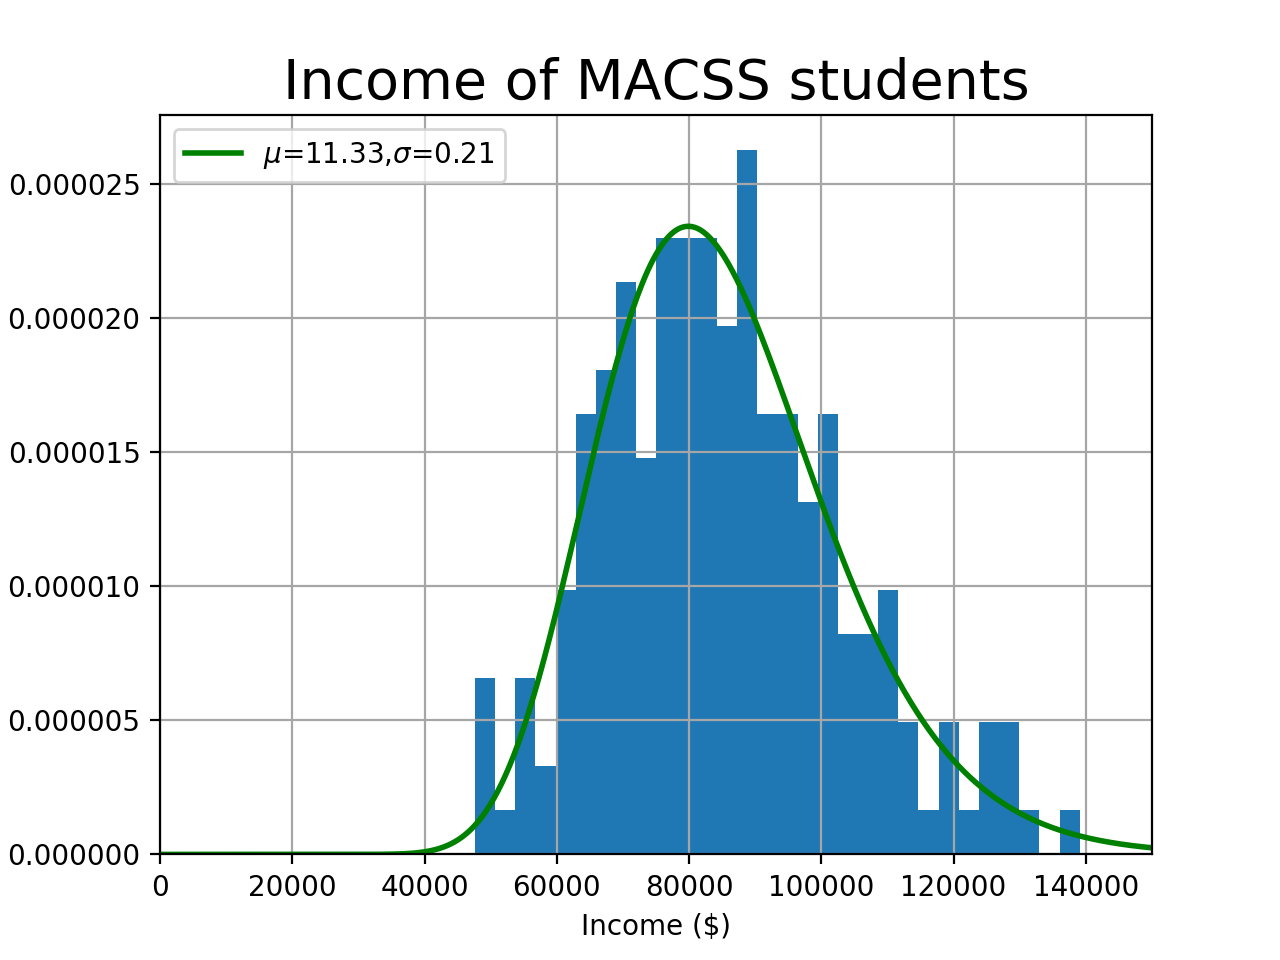

The GMM estimated mu and sigma of lognormal distribution is 11.33 and 0.21
The GMM estimated mean is 85276.83, sigma is 17992.54.
The data mean is 85276.82, sigma is 17992.54.
The value of the criterion function at GMM is 1.0855333832707681e-13


In [178]:
mu_GMM,sd_GMM =  res.x
fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.plot()
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

grain =1000
dist_pts = np.linspace(0.01, 150000,grain)
gmm_incomes = log_norm_pdf(res.x[1], res.x[0], dist_pts)
mean_gmm, sigma_gmm = model_moments(mu_GMM, sd_GMM)
ax.plot(dist_pts, gmm_incomes ,linewidth=2, color='g', label=f'$\mu$={mu_GMM:.2f},$\sigma$={sd_GMM:.2f}')
ax.grid(b=True, which='major', color='0.65', linestyle='-')
ax.legend(loc='upper left')
print(f'The GMM estimated mu and sigma of lognormal distribution is {mu_GMM:.2f} and {sd_GMM:.2f}')
print (f'The GMM estimated mean is {mean_gmm:.2f}, sigma is {sigma_gmm:.2f}.')
print (f'The data mean is {mu_d:.2f}, sigma is {sd_d:.2f}.')
#criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
print(f'The value of the criterion function at GMM is {criterion((mu_GMM, sd_GMM),incomes,np.eye(2))}')

## 1c)

In [179]:
err1 = errs(incomes, mu_GMM,sd_GMM).reshape(2,1)
# print (err1)
Omega = np.dot(err1, err1.T)/ len(incomes)
# print (VCV)
W= lin.pinv(np.matrix(Omega))
# W = lin.qr(np.matrix(Omega))[0]
# print (W)
params = np.array([mu_GMM,sd_GMM])
results = opt.minimize(criterion, params, args=(incomes, W),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))

mu_GMM_2,sd_GMM_2 =  results.x

gmm_incomes_2 = log_norm_pdf(sd_GMM_2, mu_GMM_2, dist_pts)
mean_gmm_2, sigma_gmm_2 = model_moments(mu_GMM_2, sd_GMM_2)



<IPython.core.display.Javascript object>


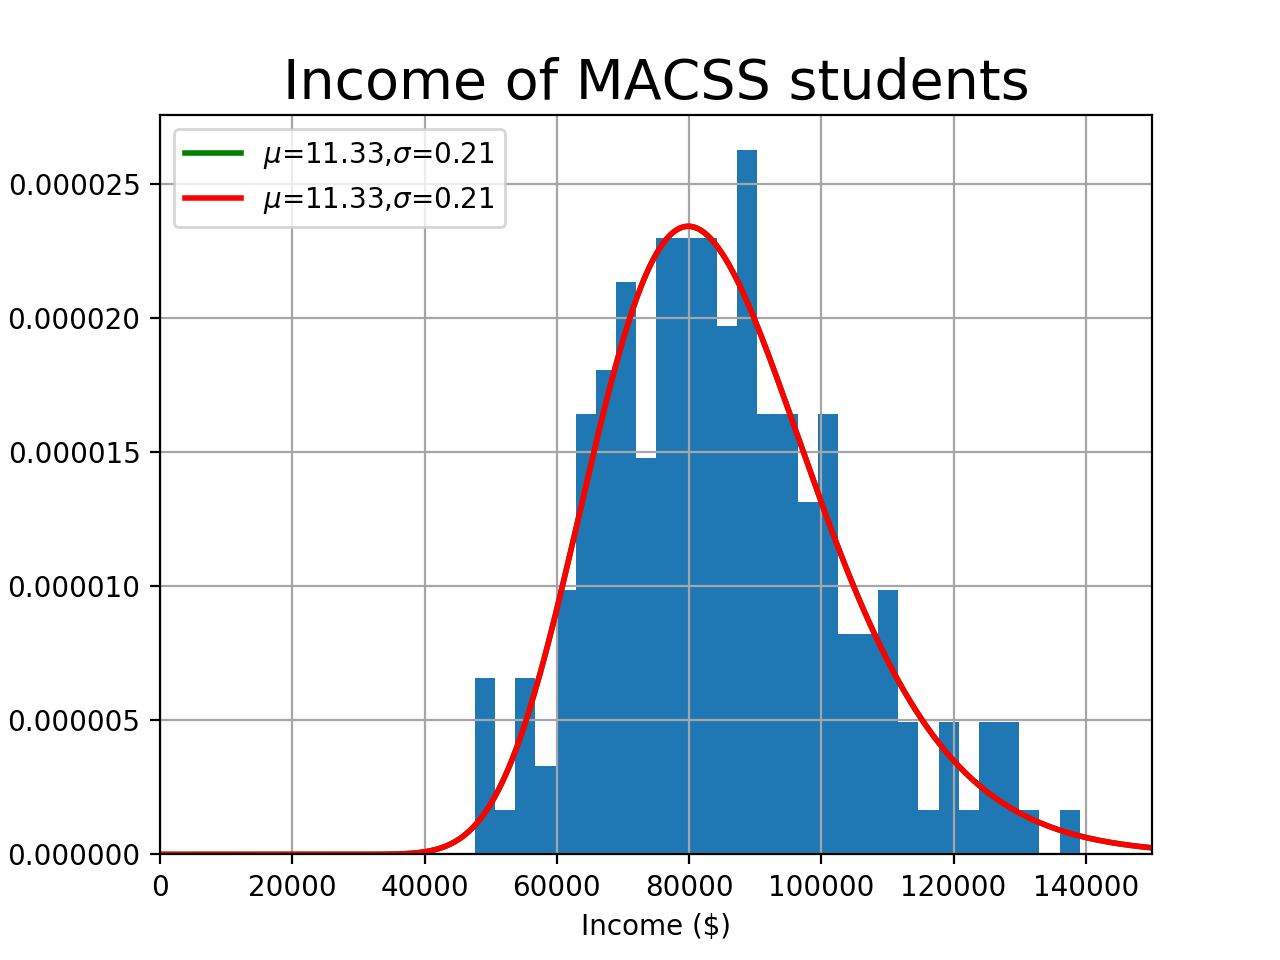

The GMM estimated mu and sigma of lognormal distribution is 11.33 and 0.21
The GMM estimated mean is 85276.83, sigma is 17992.54.
The data mean is 85276.82, sigma is 17992.54.
The value of the criterion function at GMM is 1.6052647202851115e-14


In [180]:

fig,ax = plt.subplots()
ax.hist(incomes, 30, normed=True)
ax.set_title('Income of MACSS students', fontsize=20)
ax.set_xlabel(r'Income (\$)')
ax.set_ylabel('Percent of observations')
ax.set_xlim([0,150000])

ax.plot(dist_pts, gmm_incomes ,linewidth=2, color='g', label=f'$\mu$={mu_GMM:.2f},$\sigma$={sd_GMM:.2f}')
ax.plot(dist_pts, gmm_incomes_2 ,linewidth=2, color='r', label=f'$\mu$={mu_GMM_2:.2f},$\sigma$={sd_GMM_2:.2f}')

ax.grid(b=True, which='major', color='0.65', linestyle='-')
ax.legend(loc='upper left')


print(f'The GMM estimated mu and sigma of lognormal distribution is {mu_GMM_2:.2f} and {sd_GMM_2:.2f}')
print (f'The GMM estimated mean is {mean_gmm_2:.2f}, sigma is {sigma_gmm_2:.2f}.')
print (f'The data mean is {mu_d:.2f}, sigma is {sd_d:.2f}.')
#criterion((mu_GMM, sd_GMM),incomes,np.eye(2))
print(f'The value of the criterion function at GMM is {criterion((mu_GMM_2, sd_GMM_2),incomes,np.eye(2))}')

## 1d)

In [181]:
def data_moments_3(x):
    x=np.array(x)
    N = len(x)
    bottom = sum(x < 75000)/N
    middle = np.all((x >= 75000, x <= 100000), axis = 0).sum()/N
    up = sum(x > 100000)/N
    
    return bottom, middle, up


def model_moments_3(mu, sd):
    m1 = sts.norm.cdf(np.log(75000), loc = mu, scale = np.sqrt(sd))
    m2 = sts.norm.cdf(np.log(100000), loc = mu, scale = np.sqrt(sd)) - m1
    m3 = 1 - sts.norm.cdf(np.log(100000), loc = mu, scale = np.sqrt(sd))
    return m1, m2, m3

def errs_3(x, mu, sd):
    dm = np.array(data_moments_3(x))
    mm = np.array(model_moments_3(mu, sd))
    return ((dm - mm)/dm)

def criterion_3(params, *args):
    mu, sd = params
    x, W = args 
    err = errs_3(x, mu, sd)
    return err.T @ W @err



In [184]:

params = np.array([11,0.05])
resd = opt.minimize(criterion_3, params, args=(incomes, np.eye(3)), method='L-BFGS-B', bounds=((None, None), (1e-10, None)))

In [164]:
resd.x

array([ 0.1,  0.1])